In [ ]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data,load_data_no_filter
from telescope_torch import telescopeMSE2
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib
import time
import ae_train
from losses import *

path = 'MIT_TTbar'
prefixed = [filename for filename in os.listdir(path) if filename.startswith("dt_norm")]

data = []
for p in prefixed:
    data.append([torch.load(f'{path}/{p}'),p])

In [3]:
sum_tc = []
for d in data:
    dt = d[0][:,0:48]
    sum_tc.append(torch.mean(torch.sum(dt,dim=1)))

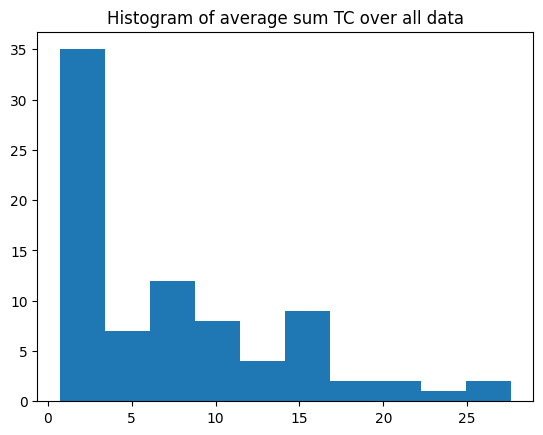

In [5]:
plt.title('Histogram of average sum TC over all data')
plt.hist(sum_tc)
plt.show()

In [16]:
stats = []
for d in data:
    s = torch.sum(d[0][:,0:48],dim=1)
#     plt.title(f'Sum TC distribution in {d[1]}')
#     plt.hist(s)
#     plt.show()
    m = torch.mean(s)
#     print(f'mean: {m}')
    stats.append([d[1],m.item()])

In [17]:
stats

[['dt_norm_3_36', 2.995450019836426],
 ['dt_norm_3_30', 3.7448925971984863],
 ['dt_norm_3_31', 3.951704978942871],
 ['dt_norm_3_33', 3.032867193222046],
 ['dt_norm_3_35', 2.5219204425811768],
 ['dt_norm_3_37', 2.8800294399261475],
 ['dt_norm_3_27', 6.187901496887207],
 ['dt_norm_3_29', 2.712803840637207],
 ['dt_norm_3_32', 3.0881106853485107],
 ['dt_norm_3_34', 3.346259832382202],
 ['dt_norm_3_38', 3.231041193008423],
 ['dt_norm_1_1', 20.858945846557617],
 ['dt_norm_1_3', 26.10483169555664],
 ['dt_norm_1_5', 27.602127075195312],
 ['dt_norm_1_7', 24.65706443786621],
 ['dt_norm_1_9', 20.70952796936035],
 ['dt_norm_1_11', 17.545988082885742],
 ['dt_norm_1_13', 14.8900146484375],
 ['dt_norm_1_15', 13.10241985321045],
 ['dt_norm_1_17', 11.4417724609375],
 ['dt_norm_1_19', 10.132476806640625],
 ['dt_norm_1_21', 9.467616081237793],
 ['dt_norm_1_23', 8.336930274963379],
 ['dt_norm_1_25', 7.885806560516357],
 ['dt_norm_1_27', 5.491463661193848],
 ['dt_norm_1_29', 3.348656415939331],
 ['dt_norm_

In [32]:
path = 'MIT_TTbar'
prefixed = [filename for filename in os.listdir(path) if filename.startswith("dt_norm")]

for p,m in zip(prefixed,stats):
    raw = torch.load(f'{path}/{p}')
    s = torch.sum(raw[:,0:48],dim=1)
    high = raw[s >= m[1]]
    low = raw[ s < m[1]]
    torch.save(high,f'{path}/{p}_high')
    torch.save(low,f'{path}/{p}_low')